In [1]:
def time_series(t):
    import numpy as np
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

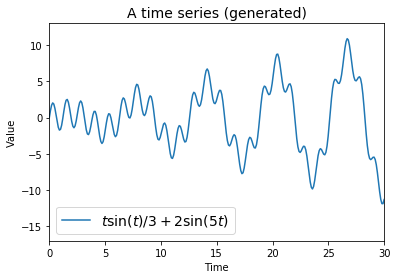

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t_min, t_max = 0, 30
resolution = 0.1
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
y = time_series(t)

fig, ax = plt.subplots(1,1)
ax.plot(t, y, label="$t\sin(t)/3 + 2\sin(5t)$")
ax.legend(loc="lower left", fontsize=14)
ax.axis([0, 30, -17, 13])
ax.set_title("A time series (generated)", fontsize=14)
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.savefig('time_series_plot.png', dpi=300)
plt.show()

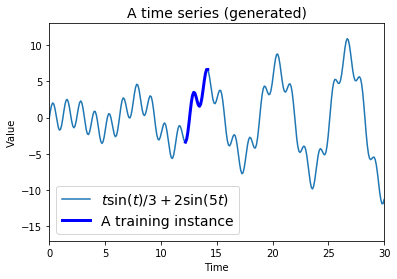

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t_min, t_max = 0, 30
resolution = 0.1
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
y = time_series(t)

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)
t_train = t_instance[:-1]
y_train = time_series(t_train)

fig, ax = plt.subplots(1,1)
ax.plot(t, y, label="$t\sin(t)/3 + 2\sin(5t)$")
ax.plot(t_train, y_train, "b-", linewidth=3, label="A training instance")
ax.legend(loc="lower left", fontsize=14)
ax.axis([0, 30, -17, 13])
ax.set_title("A time series (generated)", fontsize=14)
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.savefig('time_series_plot.png', dpi=300)
plt.show()

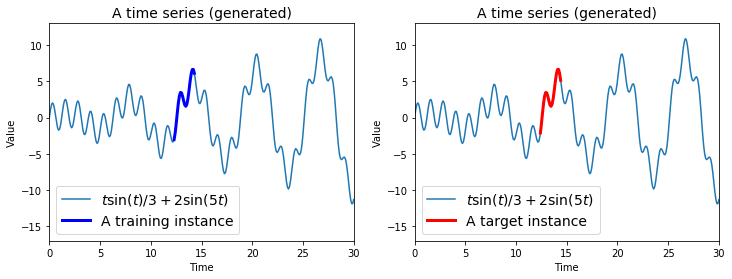

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t_min, t_max = 0, 30
resolution = 0.1
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
y = time_series(t)

n_steps = 20
t_instance = np.linspace(12.3, 12.3 + resolution * (n_steps + 1), n_steps + 1)
t_train = t_instance[:-1]
y_train = time_series(t_train)
t_target = t_instance[1:]
y_target = time_series(t_target)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(t, y, label="$t\sin(t)/3 + 2\sin(5t)$")
ax1.plot(t_train, y_train, "b-", linewidth=3, label="A training instance")
ax1.legend(loc="lower left", fontsize=14)
ax1.axis([0, 30, -17, 13])
ax1.set_title("A time series (generated)", fontsize=14)
ax1.set_xlabel("Time")
ax1.set_ylabel("Value")

ax2.plot(t, y, label="$t\sin(t)/3 + 2\sin(5t)$")
ax2.plot(t_target, y_target, "r-", linewidth=3, label="A target instance")
ax2.legend(loc="lower left", fontsize=14)
ax2.axis([0, 30, -17, 13])
ax2.set_title("A time series (generated)", fontsize=14)
ax2.set_xlabel("Time")
ax2.set_ylabel("Value")

plt.savefig('time_series_plot.png', dpi=300)
plt.show()

In [5]:
def next_batch(batch_size, n_steps, n_inputs=1):
    import numpy as np
    # batch_size, n_steps, n_inputs=1
    t0 = np.random.rand(batch_size, 1) * (t_max-t_min-n_steps*resolution) # (batch_size, 1)
    grid_points = np.arange(0., n_steps + 1) * resolution # (n_steps+1,)
    t = t0 + grid_points # (batch_size, n_steps+1) 
    y = time_series(t) # (batch_size, n_steps+1) 
    x_batch = y[:, :-1].reshape(-1, n_steps, 1)
    y_batch = y[:, 1:].reshape(-1, n_steps, 1)
    return x_batch, y_batch

In [6]:
batch_size, n_steps = 2, 5
x_batch, y_batch = next_batch(batch_size, n_steps)
print(x_batch.shape)
print(x_batch)
print(y_batch.shape)
print(y_batch)

(2, 5, 1)
[[[-0.53143497]
  [ 0.87578916]
  [ 2.13683391]
  [ 3.04233708]
  [ 3.46985297]]

 [[ 0.36082079]
  [-0.24292326]
  [-1.07278037]
  [-1.89607153]
  [-2.47790579]]]
(2, 5, 1)
[[[ 0.87578916]
  [ 2.13683391]
  [ 3.04233708]
  [ 3.46985297]
  [ 3.41280681]]

 [[-0.24292326]
  [-1.07278037]
  [-1.89607153]
  [-2.47790579]
  [-2.63893678]]]


In [7]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [8]:
lr = 0.001
epoch = 1500
batch_size = 50

In [9]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [10]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [11]:
from tensorflow.contrib.layers import fully_connected
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs, activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `layer.__call__` method instead.


In [12]:
print(outputs, states)

Tensor("Reshape_1:0", shape=(?, 20, 1), dtype=float32) Tensor("rnn/while/Exit_3:0", shape=(?, 100), dtype=float32)


In [13]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
training_op = optimizer.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [15]:
saver = tf.train.Saver()

In [16]:
with tf.Session() as sess:
    init.run()
    for iteration in range(epoch):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 17.618444
100 	MSE: 0.43730792
200 	MSE: 0.2290636
300 	MSE: 0.11821138
400 	MSE: 0.068952136
500 	MSE: 0.05415676
600 	MSE: 0.05747705
700 	MSE: 0.04935371
800 	MSE: 0.049069855
900 	MSE: 0.06039545
1000 	MSE: 0.04997426
1100 	MSE: 0.04721749
1200 	MSE: 0.051002897
1300 	MSE: 0.048506662
1400 	MSE: 0.04709926


In [17]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [18]:
y_pred

array([[[-3.1051242 ],
        [-1.15718   ],
        [ 0.39225024],
        [ 2.0426378 ],
        [ 3.0102181 ],
        [ 3.471786  ],
        [ 3.3460767 ],
        [ 2.8247    ],
        [ 2.2002795 ],
        [ 1.6917528 ],
        [ 1.5454428 ],
        [ 1.9114916 ],
        [ 2.6720626 ],
        [ 3.7950158 ],
        [ 5.0285597 ],
        [ 6.0828366 ],
        [ 6.655361  ],
        [ 6.6378407 ],
        [ 6.0634966 ],
        [ 5.0978465 ]]], dtype=float32)

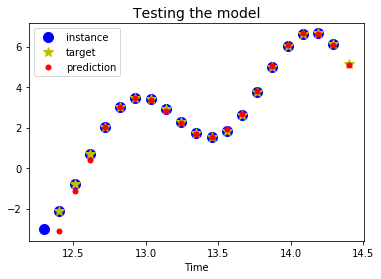

In [19]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.savefig("time_series_pred_plot.png")
plt.show()